In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [97]:
x = [1,2,1,3,2,2,1,1,1]
M = np.reshape(x,(3,3)) 

#x = [1,1,0,1,0,0,0,1,1,1,0,0]
#M = np.reshape(x,(3,4)) 

print(M)

[[1 2 1]
 [3 2 2]
 [1 1 1]]


In [98]:
U, d, Vt = np.linalg.svd(M, full_matrices=True)
D = np.diag(d)

In [99]:
U.shape, D.shape, Vt.shape

((3, 3), (3, 3), (3, 3))

In [109]:
print Vt

[[-0.65190608 -0.58022986 -0.48821284]
 [-0.61920345  0.77896859 -0.09896983]
 [-0.43772772 -0.23778404  0.86709468]]


In [107]:
np.dot(U, np.dot(D, Vt))

array([[1., 2., 1.],
       [3., 2., 2.],
       [1., 1., 1.]])

In [105]:
# Verificar que la matrix original y la reconstruccion son "parecidas"
np.allclose(M, np.dot(U, np.dot(D, Vt)))

True

In [204]:
def showm(M):
    for i in range(shape(M)[0]):
        #print(M[i])
        print '     '.join(str(n) for n in M[i])        

In [205]:
showm(U)

-0.46010039211388476     0.858639036014645     -0.22593502386414144
-0.8184934473079395     -0.5087975210477051     -0.2668212122183601
-0.3440582885073611     0.0621617921841931     0.9368883635214147


In [206]:
showm(Vt)

-0.6519060776255028     -0.58022985542917     -0.4882128437716248
-0.6192034469047873     0.7789685899618187     -0.09896982971656854
-0.4377277205023263     -0.2377840421927864     0.867094684554286


In [207]:
showm(D)

5.000166641209955     0.0     0.0
0.0     0.9780173834164683     0.0
0.0     0.0     0.20448852746882712


In [208]:
np.dot(U,np.matrix.transpose(U))

array([[ 1.00000000e+00,  6.93889390e-18, -8.32667268e-17],
       [ 6.93889390e-18,  1.00000000e+00,  8.32667268e-17],
       [-8.32667268e-17,  8.32667268e-17,  1.00000000e+00]])

## Peliculas

In [282]:
M = [[1,1,4],[1,2,2],[1,3,3],[1,6,4],[2,1,2],[2,2,5],[3,3,1],[3,4,3],[3,5,3]]

In [283]:
import pandas as pd

In [284]:
R = pd.DataFrame(M, columns = ['UserID', 'MovieID', 'Rating'])
R

,UserID,MovieID,Rating
0,1,1,4
1,1,2,2
2,1,3,3
3,1,6,4
4,2,1,2
5,2,2,5
6,3,3,1
7,3,4,3
8,3,5,3


In [285]:
R_p = R.pivot(index = 'UserID', columns ='MovieID', values = 'Rating').fillna(0)
R_p

MovieID,1,2,3,4,5,6
UserID,,,,,,
1,4.0,2.0,3.0,0.0,0.0,4.0
2,2.0,5.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,3.0,3.0,0.0


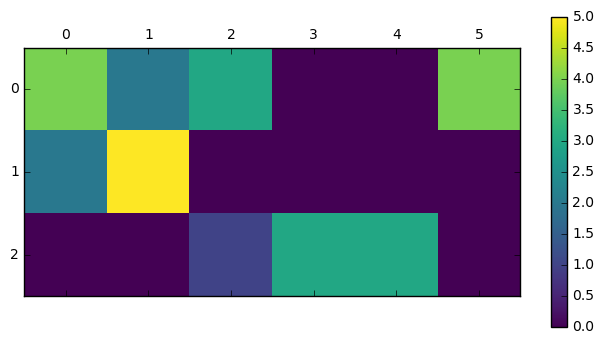

In [295]:
plt.matshow(R, cmap='viridis')
plt.colorbar()

In [296]:
R = R_p.as_matrix()
R_m = np.mean(R, axis = 1)
R_c = R - R_m.reshape(-1, 1)
R_c

array([[ 1.83333333, -0.16666667,  0.83333333, -2.16666667, -2.16666667,
         1.83333333],
       [ 0.83333333,  3.83333333, -1.16666667, -1.16666667, -1.16666667,
        -1.16666667],
       [-1.16666667, -1.16666667, -0.16666667,  1.83333333,  1.83333333,
        -1.16666667]])

In [313]:
from scipy.sparse.linalg import svds
U, d, Vt = svds(R_c, k = 2)
D = np.diag(d)

In [314]:
pred = np.dot(np.dot(U, D), Vt) + R_m.reshape(-1, 1)

In [315]:
pred

array([[ 3.85739321e+00,  2.05362381e+00,  2.98007994e+00,
        -6.12094041e-03, -6.12094041e-03,  4.12114492e+00],
       [ 1.93644966e+00,  5.02389656e+00, -8.87704320e-03,
        -2.72769488e-03, -2.72769488e-03,  5.39862116e-02],
       [-2.10585326e-01,  7.91854877e-02,  9.70584341e-01,
         2.99096130e+00,  2.99096130e+00,  1.78892900e-01]])

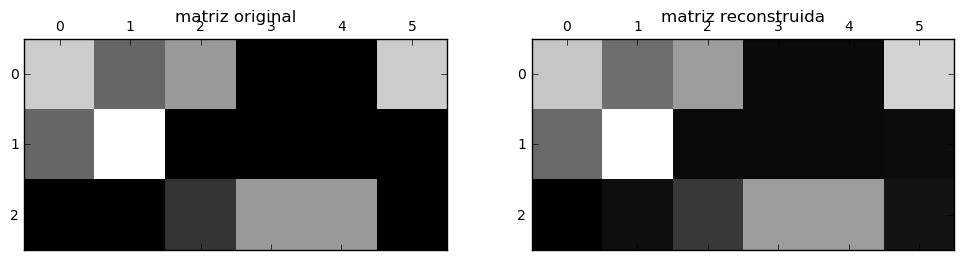

In [316]:
fig = plt.figure(1, figsize=(12, 5))
ax = fig.add_subplot(121)
ax.set_title('matriz original')
ax.matshow(R, cmap='gray')

ax = fig.add_subplot(122)
ax.set_title('matriz reconstruida')
ax.matshow(pred, cmap='gray')